In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [6]:
symbol = "NVDA"
symbol_df = yf.Ticker(symbol)
symbol_stock_history = symbol_df.history(start = "2023-01-01")
symbol_stock_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,14.837810,14.982682,14.083481,14.302286,401277000,0.0,0.0
2023-01-04 00:00:00-05:00,14.554063,14.839809,14.228353,14.735901,431324000,0.0,0.0
2023-01-05 00:00:00-05:00,14.478131,14.551066,14.135435,14.252332,389168000,0.0,0.0
2023-01-06 00:00:00-05:00,14.461146,14.996670,14.021537,14.845804,405044000,0.0,0.0
2023-01-09 00:00:00-05:00,15.270426,16.041740,15.127553,15.614120,504231000,0.0,0.0


In [7]:
symbol_stock_history = symbol_stock_history.reset_index()
print(list(symbol_stock_history))
symbol_stock_history.head()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-03 00:00:00-05:00,14.837810,14.982682,14.083481,14.302286,401277000,0.0,0.0
1,2023-01-04 00:00:00-05:00,14.554063,14.839809,14.228353,14.735901,431324000,0.0,0.0
2,2023-01-05 00:00:00-05:00,14.478131,14.551066,14.135435,14.252332,389168000,0.0,0.0
3,2023-01-06 00:00:00-05:00,14.461146,14.996670,14.021537,14.845804,405044000,0.0,0.0
4,2023-01-09 00:00:00-05:00,15.270426,16.041740,15.127553,15.614120,504231000,0.0,0.0


In [8]:
symbol_stock_history['pred_close'] = symbol_stock_history['Close'].shift(-1) #new column with showing tomorrows price in todays column
symbol_stock_history['target'] = (symbol_stock_history['pred_close']>symbol_stock_history['Close']).astype(int) # Target column with condition (0 or 1)
symbol_stock_history['MA5'] = symbol_stock_history['Close'].rolling(5).mean() #5 days moving average
symbol_stock_history['MA10'] = symbol_stock_history['Close'].rolling(10).mean() # 10 days moving average
symbol_stock_history['daily_return'] = symbol_stock_history['Close'].pct_change() # closing DOD change
symbol_stock_history['colume_change'] = symbol_stock_history['Volume'].pct_change() # volumen DOD change
symbol_stock_history['daily_spread'] = (symbol_stock_history['Close'] - symbol_stock_history['Open']) # daily spread
symbol_stock_history = symbol_stock_history.dropna()
#symbol_stock_history[symbol_stock_history.isna().any(axis=1)]

In [9]:
features = ['Open',
            'High',
            'Low',
            'Close',
            'Volume',
            'Dividends',
            'Stock Splits',
            'pred_close',
            'MA5',
            'MA10',
            'daily_return',
            'colume_change',
            'daily_spread']
x = symbol_stock_history[features]
y = symbol_stock_history['target']

In [10]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, shuffle=False ) # spliting data for training, 80train:20test, to maintain chronology

In [11]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(x_test)
precision = precision_score(y_test,y_pred)
print(precision)

0.7121212121212122


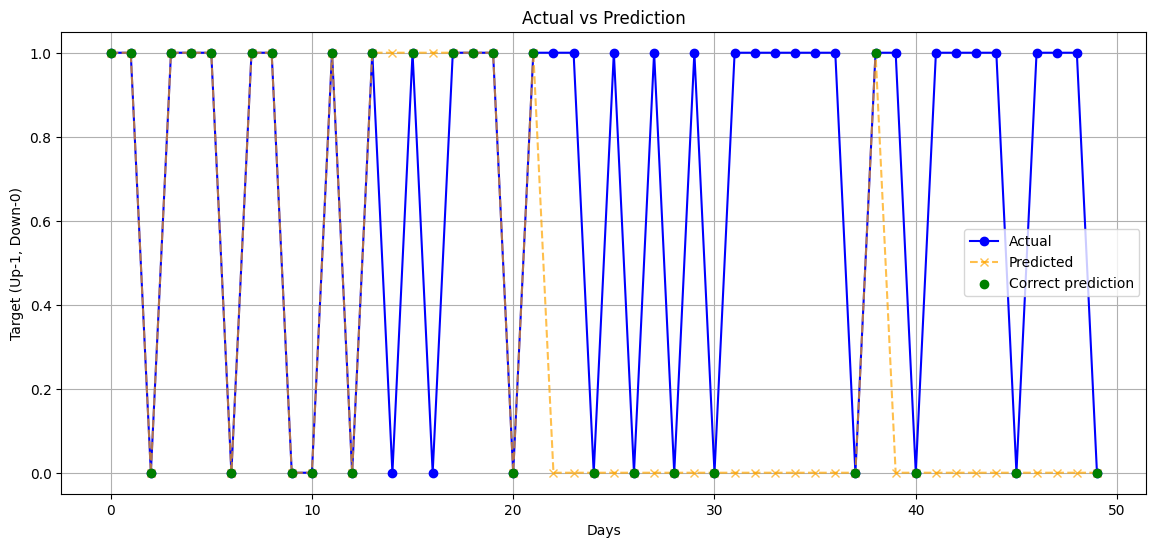

In [14]:
actual = y_test[-50:].values
predicted = y_pred[-50:]
indices = np.arange(len(actual))
correct_pred = actual == predicted
plt.figure(figsize=(14,6))
plt.plot(
    indices,
    actual,
    label="Actual",
    marker="o",
    linestyle='-',
    color = "blue",
    )
plt.plot(
    predicted,
    label = "Predicted",
    marker = "x",
    linestyle = "--",
    color = "orange",
    alpha = 0.7
    )
plt.scatter(indices[correct_pred], actual[correct_pred], color = "green", label = "Correct prediction", zorder = 5)
plt.title("Actual vs Prediction")
plt.xlabel("Days")
plt.ylabel("Target (Up-1, Down-0)")
plt.legend()
plt.grid(True)
plt.show()